# 導入不同策略 根據最新300根k棒產生的買賣序列 進行回測 畫出圖表

⚙️ 呼叫策略：symbol=ETHUSDT, interval=1d, end_time=2025-07-27 03:30:05.158748, protocol=ethereum, window=5


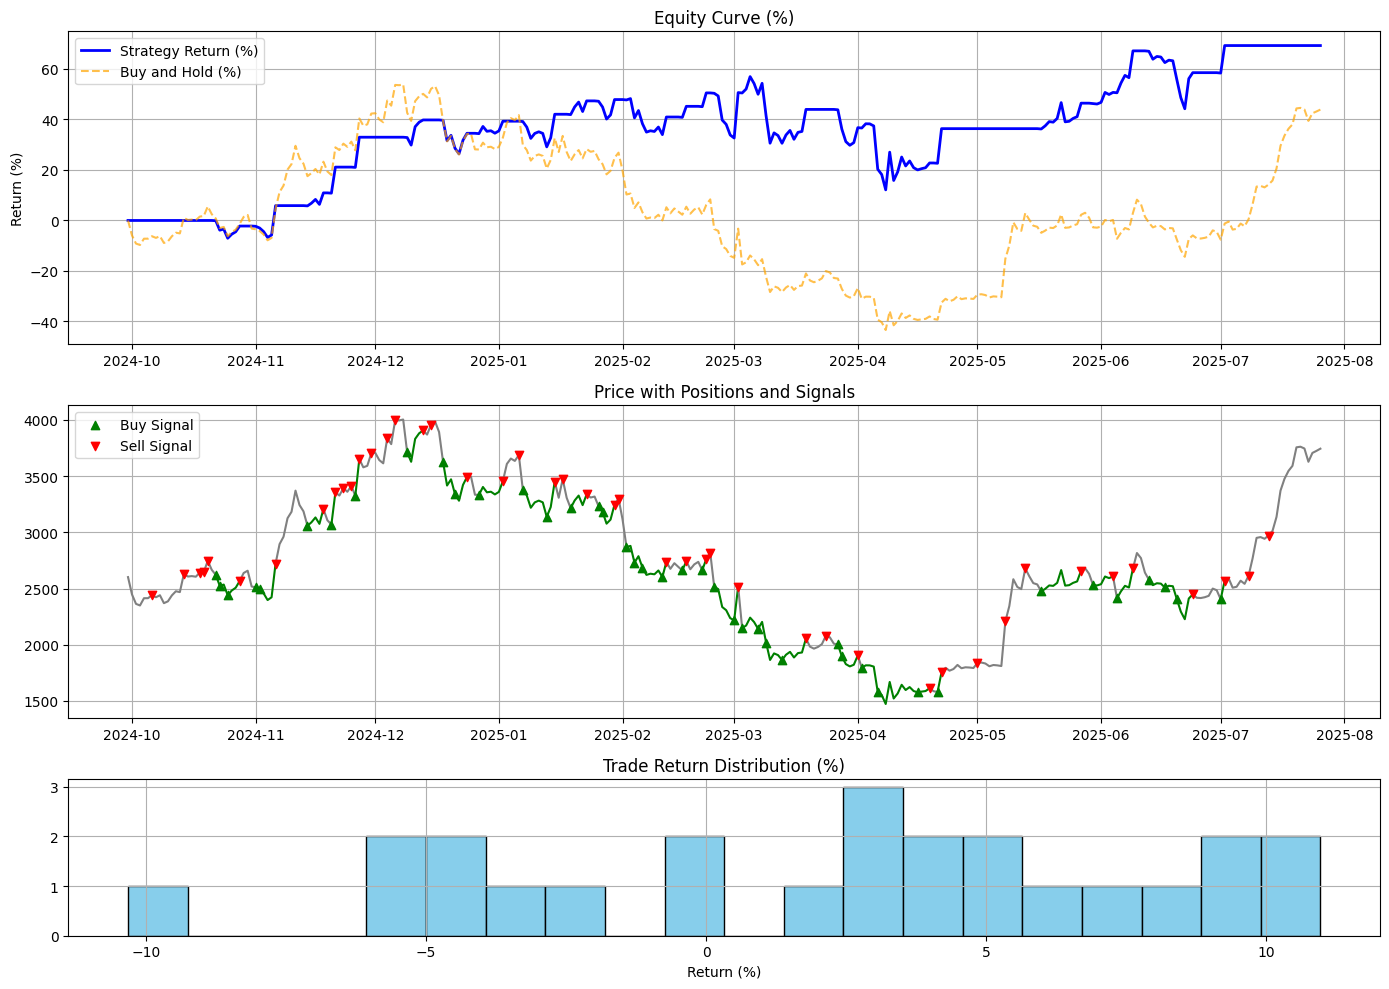

In [13]:
import Technicalindicatorstrategy
from datetime import datetime
from Backtest.backtest import backtest_signals
from Plot.plot import plot_backtest_result
import warnings 
warnings.filterwarnings('ignore')

strategies = "tvl_sma"
strat_module = getattr(Technicalindicatorstrategy, strategies)

class StrategyWrapper:
    def __init__(self,protocol='ethereum',window=5):
        self.protocol = protocol
        self.window = window

    def get_signals(self, symbol, interval, end_time):
        print(f"⚙️ 呼叫策略：symbol={symbol}, interval={interval}, end_time={end_time}, "
              f"protocol={self.protocol}, window={self.window}")
        return strat_module.get_signals(symbol, interval, end_time, protocol=self.protocol,window=self.window)

strategy = StrategyWrapper(protocol='ethereum',window=5)

df_signals = strategy.get_signals("ETHUSDT", "1d", datetime.now())
result = backtest_signals(df_signals, 
                        initial_capital=100, 
                        fee_rate=0.001, 
                        leverage=1, 
                        allow_short=False)
plot_backtest_result(result)
